In [1]:
# CNN stands for Convolutional Neural Network
# this will identify people who are wearing masks and not wearing masks. It is kind of a binary classification problem.

In [2]:
# Workflow= dataset-> image processing-> train test split-> CNN-> Evaluation

In [3]:
!pip install kaggle

In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3488.jpg', 'with_mask_319.jpg', 'with_mask_2742.jpg', 'with_mask_131.jpg', 'with_mask_2060.jpg']
['with_mask_743.jpg', 'with_mask_1829.jpg', 'with_mask_1940.jpg', 'with_mask_2459.jpg', 'with_mask_438.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3521.jpg', 'without_mask_1515.jpg', 'without_mask_1518.jpg', 'without_mask_3323.jpg', 'without_mask_757.jpg']
['without_mask_2145.jpg', 'without_mask_3732.jpg', 'without_mask_3247.jpg', 'without_mask_1703.jpg', 'without_mask_2294.jpg']


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [12]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [15]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


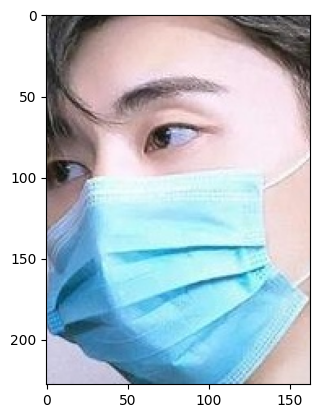

In [16]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

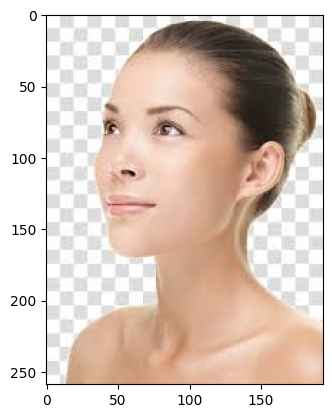

In [17]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the Images

2. Convert the images to numpy arrays

In [18]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
type(data)

list

In [20]:
len(data)

7553

In [21]:
data[0]

array([[[210, 196, 183],
        [210, 196, 183],
        [210, 196, 183],
        ...,
        [ 71,  70,  75],
        [ 72,  70,  75],
        [ 79,  74,  79]],

       [[210, 196, 183],
        [210, 196, 183],
        [210, 196, 183],
        ...,
        [ 74,  72,  78],
        [ 77,  72,  78],
        [ 80,  74,  79]],

       [[210, 196, 183],
        [210, 196, 183],
        [210, 196, 183],
        ...,
        [ 73,  72,  79],
        [ 74,  72,  78],
        [ 78,  75,  80]],

       ...,

       [[156, 156, 144],
        [156, 156, 144],
        [156, 156, 144],
        ...,
        [ 21,  20,  16],
        [ 20,  19,  15],
        [ 20,  19,  15]],

       [[156, 155, 143],
        [156, 155, 143],
        [156, 155, 143],
        ...,
        [ 16,  15,  11],
        [ 16,  15,  11],
        [ 16,  15,  11]],

       [[156, 150, 141],
        [156, 150, 141],
        [156, 150, 141],
        ...,
        [ 16,  14,   7],
        [ 16,  14,   7],
        [ 16,  13,   7]]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(Y)

numpy.ndarray

In [27]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(Y)

[1 1 1 ... 0 0 0]


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [32]:
X_train[0]

array([[[66, 38, 27],
        [67, 39, 28],
        [68, 41, 30],
        ...,
        [97, 59, 49],
        [99, 61, 50],
        [99, 61, 50]],

       [[67, 39, 28],
        [68, 40, 29],
        [70, 43, 32],
        ...,
        [97, 59, 49],
        [99, 61, 50],
        [99, 61, 50]],

       [[69, 41, 30],
        [70, 42, 31],
        [74, 46, 35],
        ...,
        [96, 58, 47],
        [99, 61, 50],
        [99, 61, 50]],

       ...,

       [[41, 29, 28],
        [41, 29, 28],
        [41, 30, 28],
        ...,
        [19, 13,  9],
        [18, 12,  8],
        [18, 12,  8]],

       [[43, 30, 29],
        [43, 30, 29],
        [43, 31, 29],
        ...,
        [20, 13, 10],
        [20, 13, 10],
        [20, 13, 10]],

       [[44, 30, 29],
        [44, 30, 29],
        [43, 31, 29],
        ...,
        [21, 13, 10],
        [21, 13, 10],
        [21, 13, 10]]], dtype=uint8)

In [33]:
X_train_scaled[0]

array([[[0.25882353, 0.14901961, 0.10588235],
        [0.2627451 , 0.15294118, 0.10980392],
        [0.26666667, 0.16078431, 0.11764706],
        ...,
        [0.38039216, 0.23137255, 0.19215686],
        [0.38823529, 0.23921569, 0.19607843],
        [0.38823529, 0.23921569, 0.19607843]],

       [[0.2627451 , 0.15294118, 0.10980392],
        [0.26666667, 0.15686275, 0.11372549],
        [0.2745098 , 0.16862745, 0.1254902 ],
        ...,
        [0.38039216, 0.23137255, 0.19215686],
        [0.38823529, 0.23921569, 0.19607843],
        [0.38823529, 0.23921569, 0.19607843]],

       [[0.27058824, 0.16078431, 0.11764706],
        [0.2745098 , 0.16470588, 0.12156863],
        [0.29019608, 0.18039216, 0.1372549 ],
        ...,
        [0.37647059, 0.22745098, 0.18431373],
        [0.38823529, 0.23921569, 0.19607843],
        [0.38823529, 0.23921569, 0.19607843]],

       ...,

       [[0.16078431, 0.11372549, 0.10980392],
        [0.16078431, 0.11372549, 0.10980392],
        [0.16078431, 0

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [36]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 23ms/step - loss: 0.4692 - acc: 0.7903 - val_loss: 0.2571 - val_acc: 0.8959
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2857 - acc: 0.8871 - val_loss: 0.2902 - val_acc: 0.9008
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2309 - acc: 0.9082 - val_loss: 0.1946 - val_acc: 0.9223
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2027 - acc: 0.9196 - val_loss: 0.1654 - val_acc: 0.9405
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1505 - acc: 0.9410 - val_loss: 0.1620 - val_acc: 0.9339


In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2153 - acc: 0.9305
Test Accuracy = 0.9305095672607422


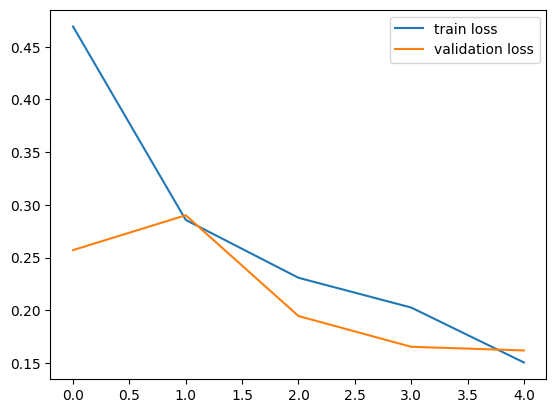

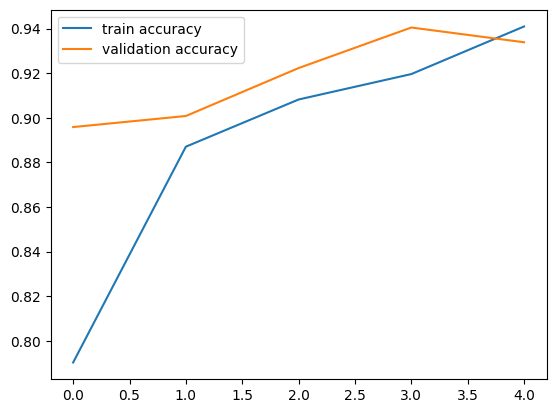

In [39]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test1.jpg


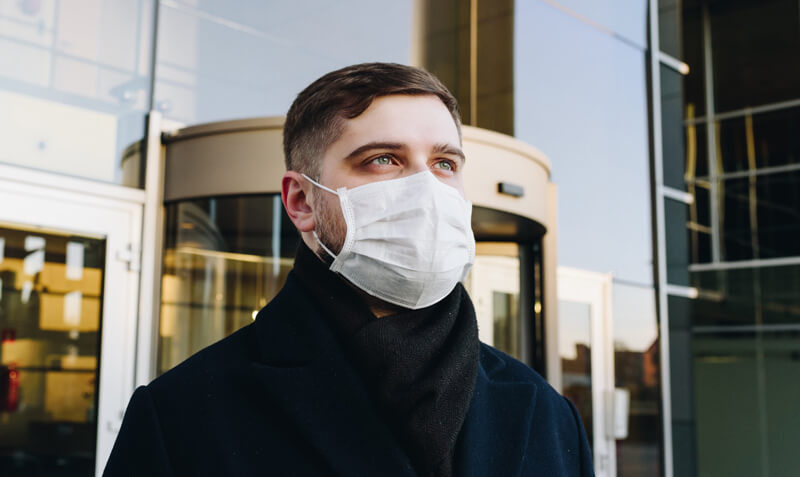

1/1 [==============================] - 0s 33ms/step
[[0.25949585 0.69569135]]
1
The person in the image is wearing a mask


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test.jpg


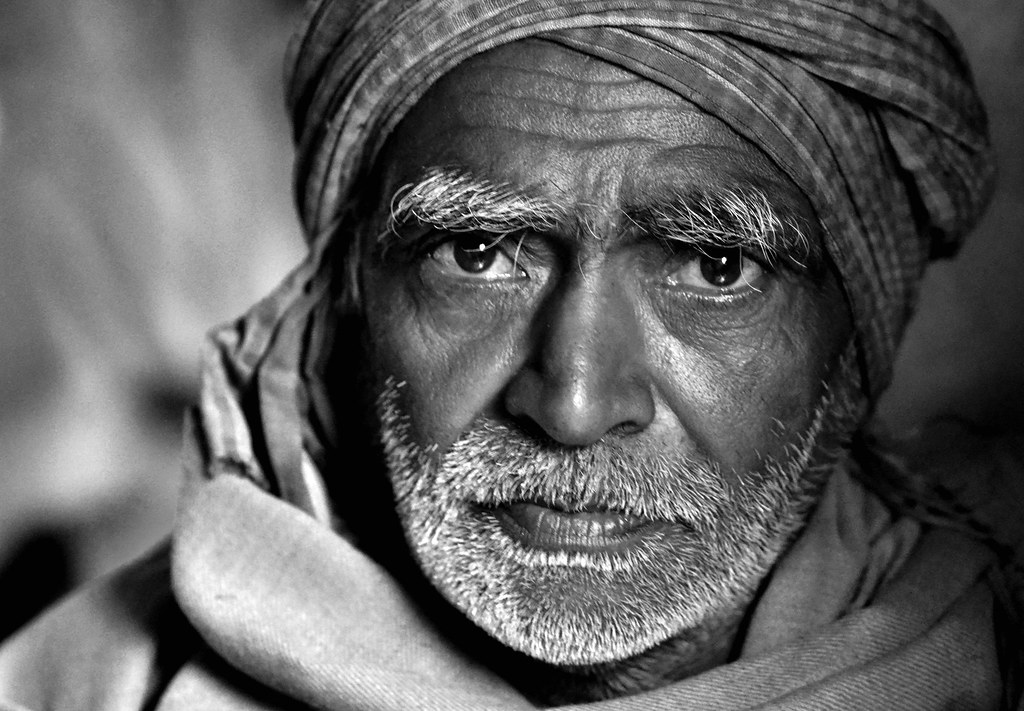

1/1 [==============================] - 0s 29ms/step
[[0.49782664 0.432456  ]]
0
The person in the image is not wearing a mask


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')